**Regression**

NOTE: 

IMPORTING LIBARIES

CHECKING THE CONSISTANCY OF THE DATA

ONE HOT ENCODER

SPLITTING THE DATASET INTO TRAIN_TEST
NORMALIZATION USING STANDARDSCALAR()

BULIDNG THE MODEL -MODEL FITTING

EVALUATE THE MODEL

MODEL PREDICTION 


In [17]:
#importing libreries 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [18]:
#algortihms that we are going to use for the regression task
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
# Preprocessing libries
from sklearn.preprocessing import StandardScaler # for normalization
#splitiing the dataset 
from sklearn.model_selection import train_test_split
# the metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
df = pd.read_csv(".\petrol_consumption.csv")
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


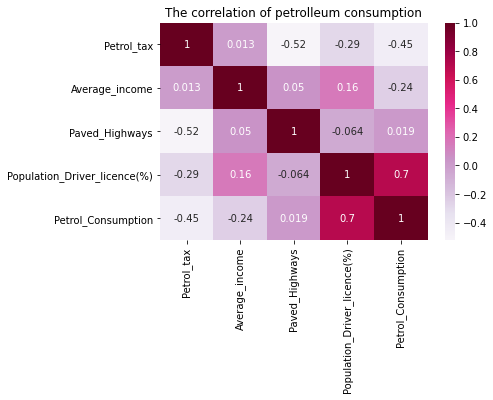

In [20]:
#correlation of the petrolleum consumption
sns.heatmap(df.corr(), annot = True, cmap ='PuRd')
plt.title("The correlation of petrolleum consumption")
plt.show()

In [21]:
df.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [22]:
#splititng the datset 
X =df.drop(['Petrol_Consumption'], axis = 1)
y = df['Petrol_Consumption']

In [23]:
X

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.00,3571,1976,0.525
1,9.00,4092,1250,0.572
2,9.00,3865,1586,0.580
3,7.50,4870,2351,0.529
4,8.00,4399,431,0.544
5,10.00,5342,1333,0.571
6,8.00,5319,11868,0.451
7,8.00,5126,2138,0.553
8,8.00,4447,8577,0.529
9,7.00,4512,8507,0.552


In [24]:
y

0     541
1     524
2     561
3     414
4     410
5     457
6     344
7     467
8     464
9     498
10    580
11    471
12    525
13    508
14    566
15    635
16    603
17    714
18    865
19    640
20    649
21    540
22    464
23    547
24    460
25    566
26    577
27    631
28    574
29    534
30    571
31    554
32    577
33    628
34    487
35    644
36    640
37    704
38    648
39    968
40    587
41    699
42    632
43    591
44    782
45    510
46    610
47    524
Name: Petrol_Consumption, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state= 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33, 4), (15, 4), (33,), (15,))

In [26]:
#normaliztion
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
#model buliding
rand_model =RandomForestRegressor()
rand_model.fit(X_train, y_train) # FITTING THE MODEL/BUILD
y_pred = rand_model.predict(X_test)

In [29]:
#EVALUTING THE MODEL

mse = mean_absolute_error(y_test, y_pred)
mse 


70.75866666666667

In [30]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

In [31]:
mse = mean_absolute_error(y_test, y_pred)
mse 

63.02652446557511